In [1]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [2]:
# import the libraries as shown below
import tensorflow as tf
import cv2
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
#import matplotlib.pyplot as plt

In [3]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

In [4]:
vgg16 = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [5]:
# don't train existing weights
for layer in vgg16.layers:
    layer.trainable = False

In [6]:
import tensorflow as tf

In [7]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)
# cache_dir indicates where to download data. I specified . which means current directory
# untar true will unzip it

In [8]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

WindowsPath('datasets/flower_photos')

In [9]:
flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}

flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

In [10]:
X, y = [], []

for flower_name, images in flowers_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(224,224))
        X.append(resized_img)
        y.append(flowers_labels_dict[flower_name])

In [11]:
X = np.array(X)
y = np.array(y)

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [13]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [14]:
X_train_scaled

array([[[[0.27843137, 0.3254902 , 0.31764706],
         [0.24705882, 0.28235294, 0.2627451 ],
         [0.25490196, 0.27058824, 0.24705882],
         ...,
         [0.18823529, 0.15294118, 0.14117647],
         [0.18823529, 0.15294118, 0.14117647],
         [0.18823529, 0.15294118, 0.14117647]],

        [[0.23137255, 0.25882353, 0.25490196],
         [0.23137255, 0.25490196, 0.23529412],
         [0.25490196, 0.2627451 , 0.23921569],
         ...,
         [0.18823529, 0.15294118, 0.14117647],
         [0.18823529, 0.15294118, 0.14117647],
         [0.19607843, 0.16078431, 0.14901961]],

        [[0.21960784, 0.22352941, 0.21960784],
         [0.23921569, 0.24313725, 0.22745098],
         [0.25098039, 0.25098039, 0.22745098],
         ...,
         [0.18823529, 0.15294118, 0.14117647],
         [0.19215686, 0.15686275, 0.14509804],
         [0.19607843, 0.16470588, 0.15294118]],

        ...,

        [[0.19215686, 0.49803922, 0.37647059],
         [0.14901961, 0.2627451 , 0.19607843]

In [15]:
y_train

array([2, 0, 1, ..., 2, 3, 3])

In [16]:
# our layers - you can add more if you want
x = Flatten()(vgg16.output)

In [17]:
prediction = Dense(5, activation='softmax')(x)

# create a model object
model = Model(inputs=vgg16.input, outputs=prediction)

In [18]:
# view the structure of the model
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [19]:
# tell the model what cost and optimization method to use
model.compile(
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  optimizer='adam',
  metrics=['accuracy']
)

In [20]:
X_train_scaled.shape

(2752, 224, 224, 3)

In [21]:
y_train.shape

(2752,)

In [22]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit(
  X_train_scaled,y_train,
    validation_split=0.33,
  epochs=5
)

Epoch 1/5


C:\Users\LENOVO\anaconda3\lib\site-packages\keras\backend.py:5612: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


58/58 [==============================] - 1073s 19s/step - loss: 0.8156 - accuracy: 0.7005 - val_loss: 0.6509 - val_accuracy: 0.7954
Epoch 2/5
58/58 [==============================] - 653s 11s/step - loss: 0.2510 - accuracy: 0.9251 - val_loss: 0.5692 - val_accuracy: 0.8130
Epoch 3/5
58/58 [==============================] - 630s 11s/step - loss: 0.1208 - accuracy: 0.9696 - val_loss: 0.6064 - val_accuracy: 0.7932
Epoch 4/5
58/58 [==============================] - 609s 11s/step - loss: 0.0733 - accuracy: 0.9908 - val_loss: 0.5895 - val_accuracy: 0.8185
Epoch 5/5
58/58 [==============================] - 675s 12s/step - loss: 0.0373 - accuracy: 0.9989 - val_loss: 0.5630 - val_accuracy: 0.8306


In [23]:
model.evaluate(X_test_scaled,y_test)

29/29 [==============================] - 233s 8s/step - loss: 0.5115 - accuracy: 0.8268


[0.511519193649292, 0.826797366142273]

In [24]:
import matplotlib.pyplot as plt

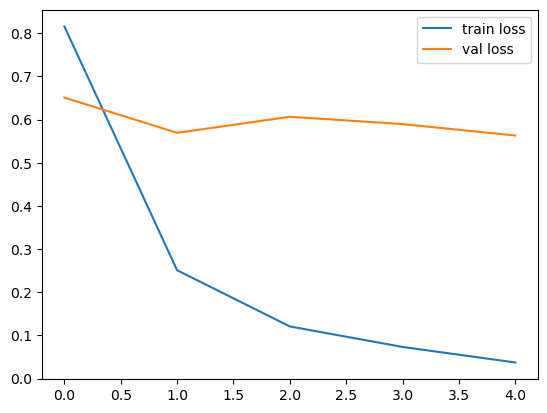

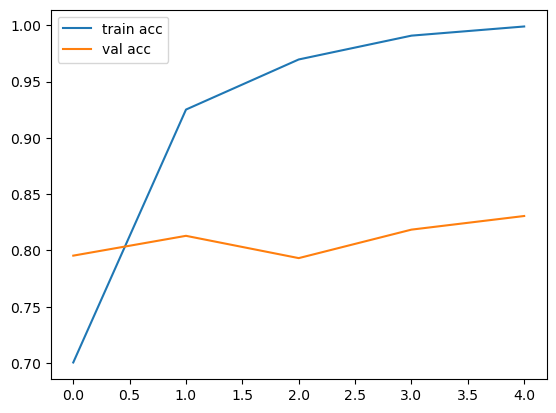

<Figure size 640x480 with 0 Axes>

In [25]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [26]:
model.save('VGG16.h5')

In [27]:
# pickling the model
import pickle
pickle_out = open("VGG16.pkl", "wb")
pickle.dump(model, pickle_out)
pickle_out.close()